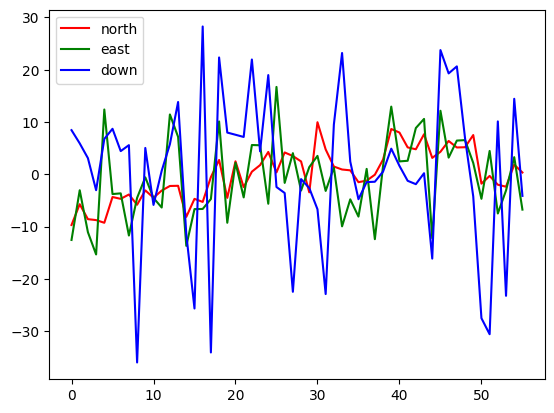

In [3]:
import os

from analyst.viewhandler import  viewnedpreprocoverview
from config.configutil import getpath

viewnedpreprocoverview(getpath('preprocpath','alic'))

In [10]:
from numpy.random import random
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# 期望输入数据尺寸: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # 返回维度为 32 的向量序列
model.add(LSTM(32, return_sequences=True))  # 返回维度为 32 的向量序列
model.add(LSTM(32))  # 返回维度为 32 的单个向量
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()
# 生成虚拟训练数据
x_train = random((1000, timesteps, data_dim))
y_train = random((1000, num_classes))

# 生成虚拟验证数据
x_val = random((100, timesteps, data_dim))
y_val = random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

D:\ProgramData\Anaconda3\envs\tf_2_8\lib\site-packages\tensorflow\python\framework\dtypes.py:585: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations